In [1]:
#Import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("employee_reviews.csv")

In [3]:
"""
Iterate through the dataframe and find the weight.
Start year is 2008, end year is 2018.
Formula for years: 0.5 ^ (end year (2018) - current year)
Weight = log(helpful-count) w/ base ln(total reviews/votes)/ln(100) * 0.5 ^ (end year (2018) - current year)
"""

maxYear = None
minYear = None
maxCount = 0
companyDictList = []
for i in range(4):
    companyDictList.append({})
companyNames = list(df['company'].value_counts().keys())
for compName in companyNames:
    for companyDict in companyDictList:
        companyDict[compName] = {'overall': 0, 'overall-weight': 0, \
                                 'work-life': 0, 'work-life-weight': 0, \
                                 'cultural-values': 0, 'cultural-values-weight': 0, \
                                 'career-growth': 0, 'career-growth-weight': 0, \
                                 'compensation': 0, 'compensation-weight': 0, \
                                 'management': 0, 'management-weight': 0}

for index, row in df.iterrows():
    if row['helpful-count'] > maxCount:
        maxCount = row['helpful-count']
    year = row['dates'][-4:]
    if year.isdigit():
        year = int(year)
        if maxYear == None: maxYear = year
        if year > maxYear:
            maxYear = year
        if minYear == None: minYear = year
        if year < minYear:
            minYear = year
yearDif = maxYear - minYear
factor = math.log(maxCount) / math.log(100)

# No weight for control (i = 0), weight for date only (i = 1), for count only (i = 2), for both (i = 3)
for index, row in df.iterrows():
    for i in range(len(companyDictList)):
        weight = 1
        if i % 2 == 1:
            if row['dates'][-4:].isdigit(): weight *= math.pow(0.5, maxYear - int(year))
            # assume year is start year (2008) if not provided
        if i > 1:
            weight *= math.pow(row['helpful-count'] + 1, 1 / factor)
        company = companyDictList[i][row['company']]
        if row['overall-ratings'] != 'none':
            company['overall'] += weight * float(row['overall-ratings'])
            company['overall-weight'] += weight
        if row['work-balance-stars'] != 'none':
            company['work-life'] += weight * float(row['work-balance-stars'])
            company['work-life-weight'] += weight
        if row['culture-values-stars'] != 'none':
            company['cultural-values'] += weight * float(row['culture-values-stars'])
            company['cultural-values-weight'] += weight
        if row['carrer-opportunities-stars'] != 'none':
            company['career-growth'] += weight * float(row['carrer-opportunities-stars'])
            company['career-growth-weight'] += weight
        if row['comp-benefit-stars'] != 'none':
            company['compensation'] += weight * float(row['comp-benefit-stars'])
            company['compensation-weight'] += weight
        if row['senior-mangemnet-stars'] != 'none':
            company['management'] += weight * float(row['senior-mangemnet-stars'])
            company['management-weight'] += weight

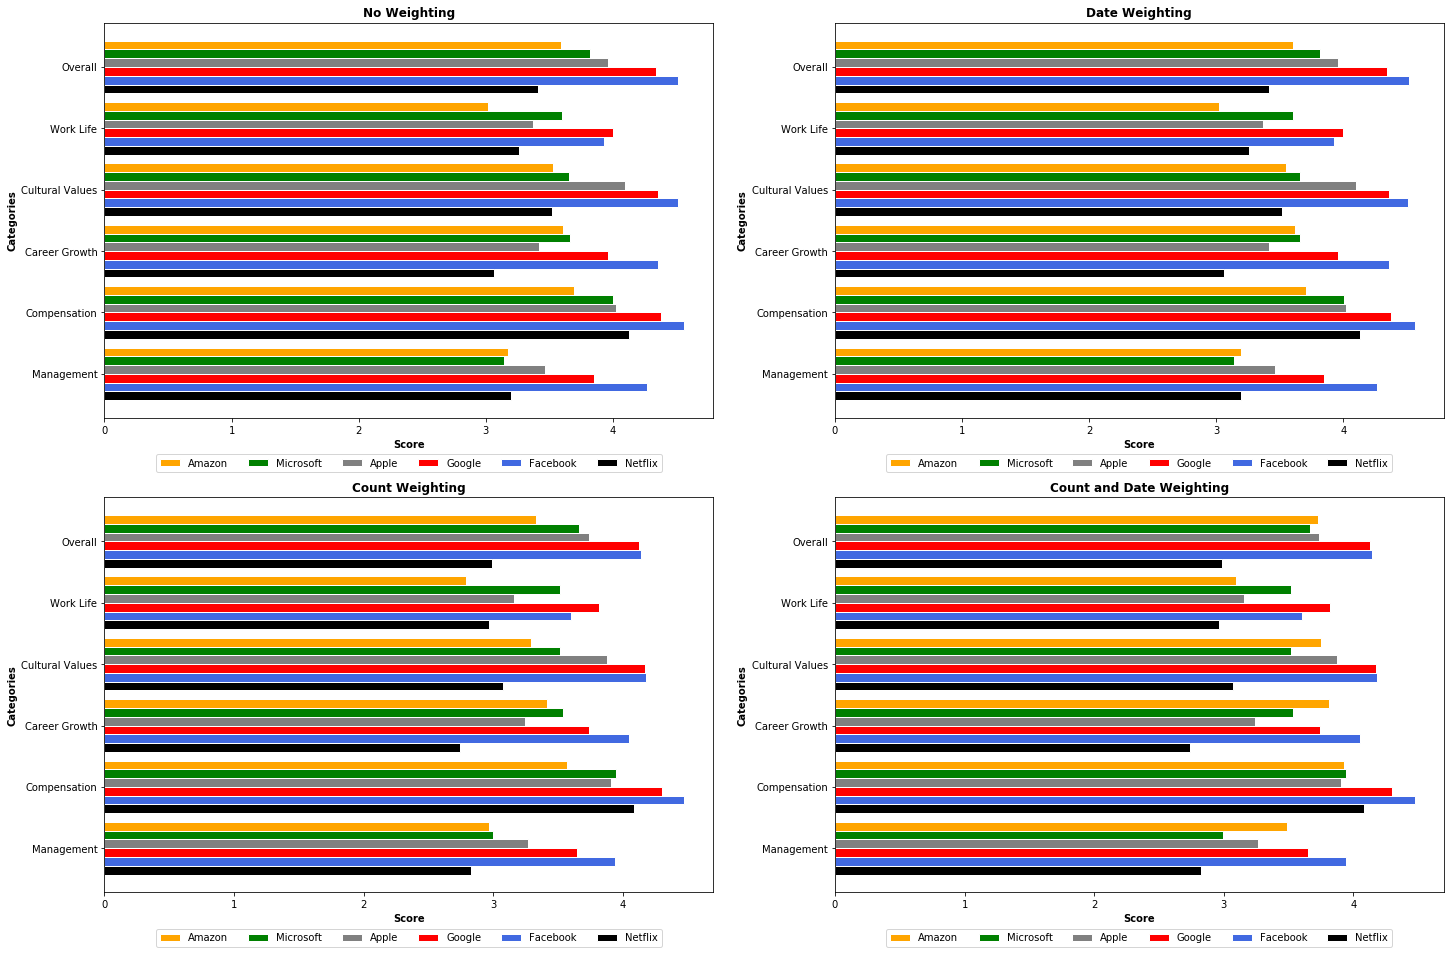

In [5]:
barWidth = 1.0 / (len(companyNames) + 1)
 
# set height of bar
for i in range(len(companyDictList)):
    barArray = []
    for k in range(len(companyNames)):
        barArray.append([])
    plt.subplot(int(math.sqrt(len(companyDictList))), int(math.sqrt(len(companyDictList))), i + 1)
    for j in range(len(companyNames)):
        company = companyDictList[i][companyNames[j]]
        barArray[j].append(company['overall'] / company['overall-weight'])
        barArray[j].append(company['work-life'] / company['work-life-weight'])
        barArray[j].append(company['cultural-values'] / company['cultural-values-weight'])
        barArray[j].append(company['career-growth'] / company['career-growth-weight'])
        barArray[j].append(company['compensation'] / company['compensation-weight'])
        barArray[j].append(company['management'] / company['management-weight'])
 
    # Set position of bar on X axis
    r1 = np.arange(len(barArray[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]

    # Make the plot
    p1 = plt.barh(r1, barArray[0], color='orange', height=barWidth, edgecolor='white', label='Amazon')
    p2 = plt.barh(r2, barArray[1], color='green', height=barWidth, edgecolor='white', label='Microsoft')
    p3 = plt.barh(r3, barArray[2], color='gray', height=barWidth, edgecolor='white', label='Apple')
    p4 = plt.barh(r4, barArray[3], color='red', height=barWidth, edgecolor='white', label='Google')
    p5 = plt.barh(r5, barArray[4], color='royalblue', height=barWidth, edgecolor='white', label='Facebook')
    p6 = plt.barh(r6, barArray[5], color='black', height=barWidth, edgecolor='white', label='Netflix')
 
    # Add xticks on the middle of the group bars
    title = 'No Weighting'
    if i == 1:
        title = 'Date Weighting'
    if i == 2:
        title = 'Count Weighting'
    if i == 3:
        title = 'Count and Date Weighting'
    plt.title(title, fontsize='larger', fontweight='bold')
    plt.ylabel('Categories', fontsize='medium', fontweight='bold')
    plt.xlabel('Score', fontsize='medium', fontweight='bold')
    plt.yticks([r + (len(companyNames) - 1) / 2 * barWidth for r in range(len(barArray[0]))], ['Overall', 'Work Life', 'Cultural Values', 'Career Growth', 'Compensation', 'Management'])
    plt.gca().invert_yaxis()
    # Create legend & Show graphic
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize='medium', ncol = 6)
plt.rcParams['figure.figsize'] = [24, 16]
plt.show()